
 Import the libraries


In [45]:
#Data handling libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import DBSCAN, KMeans
from sklearn.compose import make_column_transformer
from sklearn.datasets import load_sample_image, make_blobs
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier, StackingRegressor
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS
from sklearn.metrics import auc, confusion_matrix, ConfusionMatrixDisplay, davies_bouldin_score, rand_score, roc_auc_score, roc_curve, silhouette_samples, silhouette_score 
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import statsmodels.api as sm

In [46]:
# Read the csv file
df = pd.read_csv('data_dog.csv')

In [47]:
df.head()

,size_dog,eye_circularity,skull_circularity,ear_size,eyes_distance,ear_form,hair_tone,nose_elongatedness,weight_dog,muzzle_form,skin_tone_main,skin_pattern_complexity,body_length,tail_length,hair_curlness,hair_length,leg_front_number,leg_back_number,breuni_class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,fashion_lifestyle_elite
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,fashion_lifestyle_elite
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,main_stream
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,fashion_lifestyle_elite
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,trendy


In [48]:
df.isna().sum()

size_dog                   0
eye_circularity            5
skull_circularity          4
ear_size                   6
eyes_distance              2
ear_form                   0
hair_tone                  1
nose_elongatedness         1
weight_dog                 3
muzzle_form                0
skin_tone_main             3
skin_pattern_complexity    2
body_length                2
tail_length                4
hair_curlness              6
hair_length                1
leg_front_number           1
leg_back_number            0
breuni_class               0
dtype: int64

In [49]:
dogStr_df = df[['breuni_class']]
dogStr_df.head()

,breuni_class
0,fashion_lifestyle_elite
1,fashion_lifestyle_elite
2,main_stream
3,fashion_lifestyle_elite
4,trendy


In [50]:
dogNoStr_df= df.drop(columns='breuni_class')

In [51]:
imp = SimpleImputer(strategy='mean')

In [52]:
imp.fit(dogNoStr_df)

SimpleImputer()

In [53]:
imp.transform(dogNoStr_df)

array([[ 95.,  48.,  83., ...,  16., 187., 197.],
       [ 91.,  41.,  84., ...,  14., 189., 199.],
       [104.,  50., 106., ...,   9., 188., 196.],
       ...,
       [106.,  54., 101., ...,   4., 187., 201.],
       [ 86.,  36.,  78., ...,  25., 190., 195.],
       [ 85.,  36.,  66., ...,  18., 186., 190.]])

In [54]:
filledDogNoStr_df= pd.DataFrame(imp.transform(dogNoStr_df),columns=dogNoStr_df.columns)
filledDogNoStr_df.isna().sum()


size_dog                   0
eye_circularity            0
skull_circularity          0
ear_size                   0
eyes_distance              0
ear_form                   0
hair_tone                  0
nose_elongatedness         0
weight_dog                 0
muzzle_form                0
skin_tone_main             0
skin_pattern_complexity    0
body_length                0
tail_length                0
hair_curlness              0
hair_length                0
leg_front_number           0
leg_back_number            0
dtype: int64

In [55]:
filledDog_df=filledDogNoStr_df.join(dogStr_df)
filledDog_df.head()

,size_dog,eye_circularity,skull_circularity,ear_size,eyes_distance,ear_form,hair_tone,nose_elongatedness,weight_dog,muzzle_form,skin_tone_main,skin_pattern_complexity,body_length,tail_length,hair_curlness,hair_length,leg_front_number,leg_back_number,breuni_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,fashion_lifestyle_elite
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,fashion_lifestyle_elite
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,main_stream
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,fashion_lifestyle_elite
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,trendy


In [56]:
filledDog_df.describe().T

,count,mean,std,min,25%,50%,75%,max
size_dog,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
eye_circularity,846.0,44.828775,6.133943,33.0,40.00,44.0,49.00,59.0
skull_circularity,846.0,82.110451,15.740902,40.0,70.00,80.0,98.00,112.0
ear_size,846.0,168.888095,33.400979,104.0,141.00,168.0,195.00,333.0
eyes_distance,846.0,61.678910,7.882119,47.0,57.00,61.0,65.00,138.0
ear_form,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
hair_tone,846.0,168.901775,33.195188,112.0,147.00,157.0,198.00,265.0
nose_elongatedness,846.0,40.933728,7.811559,26.0,33.00,43.0,46.00,61.0
weight_dog,846.0,20.582444,2.588326,17.0,19.00,20.0,23.00,29.0
muzzle_form,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


In [57]:
filledDog_df.skew()

/tmp/ipykernel_318031/3269446648.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  filledDog_df.skew()


size_dog                   0.381271
eye_circularity            0.262584
skull_circularity          0.106837
ear_size                   0.396381
eyes_distance              3.834882
ear_form                   6.778394
hair_tone                  0.607629
nose_elongatedness         0.047875
weight_dog                 0.772254
muzzle_form                0.256359
skin_tone_main             0.652753
skin_pattern_complexity    0.843027
body_length                0.279647
tail_length                2.088422
hair_curlness              0.779277
hair_length                0.688423
leg_front_number           0.249468
leg_back_number           -0.226341
dtype: float64

In [58]:
filledDog_df.corr()

,size_dog,eye_circularity,skull_circularity,ear_size,eyes_distance,ear_form,hair_tone,nose_elongatedness,weight_dog,muzzle_form,skin_tone_main,skin_pattern_complexity,body_length,tail_length,hair_curlness,hair_length,leg_front_number,leg_back_number
size_dog,1.000000,0.685421,0.789909,0.689840,0.091704,0.148249,0.812235,-0.788643,0.813636,0.676143,0.762770,0.815901,0.585156,-0.250071,0.235687,0.157387,0.298526,0.365552
eye_circularity,0.685421,1.000000,0.793016,0.620967,0.153362,0.251208,0.848207,-0.821901,0.844972,0.961943,0.796822,0.838525,0.926888,0.052642,0.144394,-0.011851,-0.105645,0.045318
skull_circularity,0.789909,0.793016,1.000000,0.767079,0.158397,0.264550,0.904400,-0.911435,0.893128,0.774669,0.861980,0.887328,0.705953,-0.225852,0.113813,0.265553,0.145563,0.332095
ear_size,0.689840,0.620967,0.767079,1.000000,0.663559,0.450036,0.734228,-0.789795,0.708285,0.569205,0.794041,0.720150,0.536536,-0.180819,0.048720,0.173832,0.382129,0.471262
eyes_distance,0.091704,0.153362,0.158397,0.663559,1.000000,0.648704,0.103715,-0.183264,0.079395,0.127128,0.273414,0.089620,0.122111,0.152776,-0.058481,-0.032134,0.239849,0.267724
ear_form,0.148249,0.251208,0.264550,0.450036,0.648704,1.000000,0.165967,-0.180041,0.161592,0.305943,0.318955,0.143713,0.189704,0.295574,0.015439,0.043489,-0.026180,0.143919
hair_tone,0.812235,0.848207,0.904400,0.734228,0.103715,0.165967,1.000000,-0.970723,0.989370,0.808356,0.948296,0.993784,0.799266,-0.027985,0.074308,0.213127,0.005167,0.118448
nose_elongatedness,-0.788643,-0.821901,-0.911435,-0.789795,-0.183264,-0.180041,-0.970723,1.000000,-0.949077,-0.775519,-0.936715,-0.955074,-0.766029,0.103481,-0.051997,-0.185691,-0.114727,-0.216719
weight_dog,0.813636,0.844972,0.893128,0.708285,0.079395,0.161592,0.989370,-0.949077,1.000000,0.811447,0.934568,0.989490,0.797068,-0.015676,0.082974,0.214734,-0.018990,0.099191
muzzle_form,0.676143,0.961943,0.774669,0.569205,0.127128,0.305943,0.808356,-0.775519,0.811447,1.000000,0.745209,0.796018,0.866425,0.041220,0.135745,0.001658,-0.104254,0.076770


In [59]:
filledDog_df.cov()

,size_dog,eye_circularity,skull_circularity,ear_size,eyes_distance,ear_form,hair_tone,nose_elongatedness,weight_dog,muzzle_form,skin_tone_main,skin_pattern_complexity,body_length,tail_length,hair_curlness,hair_length,leg_front_number,leg_back_number
size_dog,67.806566,34.620494,102.386510,189.733201,5.952058,5.616954,222.020316,-50.728711,17.341435,80.818554,196.942280,1185.534590,156.822459,-15.379057,9.515833,11.574292,15.123304,22.391727
eye_circularity,34.620494,37.625259,76.568661,127.223538,7.414810,7.089993,172.709659,-39.381921,13.415316,85.649615,153.253466,907.604107,185.040913,2.411587,4.342730,-0.649223,-3.986721,2.067823
skull_circularity,102.386510,76.568661,247.776010,403.300589,19.652592,19.160666,472.569263,-112.070961,36.388354,177.003805,425.438148,2464.644940,361.664563,-26.551209,8.784101,37.331145,14.096387,38.886173
ear_size,189.733201,127.223538,403.300589,1115.625421,174.695555,69.163894,814.076988,-206.068276,61.233086,275.971414,831.594492,4244.463088,583.254772,-45.106021,7.978816,51.853680,78.523145,117.091234
eyes_distance,5.952058,7.414810,19.652592,174.695555,62.127792,23.526773,27.136958,-11.283864,1.619785,14.545237,67.573114,124.648619,31.325436,8.993516,-2.260124,-2.261997,11.630790,15.697588
ear_form,5.616954,7.089993,19.160666,69.163894,23.526773,21.171195,25.349520,-6.471152,1.924467,20.433808,46.016228,116.683212,28.408529,10.157089,0.348309,1.787063,-0.741079,4.925981
hair_tone,222.020316,172.709659,472.569263,814.076988,27.136958,25.349520,1101.920529,-251.714453,85.006635,389.505981,987.026190,5821.137182,863.509270,-6.937983,12.094379,63.183421,1.055151,29.248686
nose_elongatedness,-50.728711,-39.381921,-112.070961,-206.068276,-11.283864,-6.471152,-251.714453,61.020460,-19.189263,-87.936023,-229.432281,-1316.483217,-194.752701,6.037093,-1.991557,-12.954457,-5.513575,-12.593230
weight_dog,17.341435,13.415316,36.388354,61.233086,1.619785,1.924467,85.006635,-19.189263,6.699432,30.487055,75.847164,451.929780,67.145163,-0.303024,1.053018,4.963755,-0.302386,1.909835
muzzle_form,80.818554,85.649615,177.003805,275.971414,14.545237,20.433808,389.505981,-87.936023,30.487055,210.704141,339.175332,2038.918091,409.324642,4.468622,9.661310,0.214970,-9.310140,8.289506


In [60]:
filledDog_df.kurtosis()

/tmp/ipykernel_318031/747041557.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  filledDog_df.kurtosis()


size_dog                   -0.535275
eye_circularity            -0.910522
skull_circularity          -0.967634
ear_size                    0.328540
eyes_distance              29.966659
ear_form                   58.375455
hair_tone                  -0.613741
nose_elongatedness         -0.864066
weight_dog                 -0.381201
muzzle_form                -0.770098
skin_tone_main              0.131185
skin_pattern_complexity    -0.197182
body_length                -0.490388
tail_length                11.524125
hair_curlness               0.116198
hair_length                -0.141343
leg_front_number           -0.585897
leg_back_number            -0.813435
dtype: float64

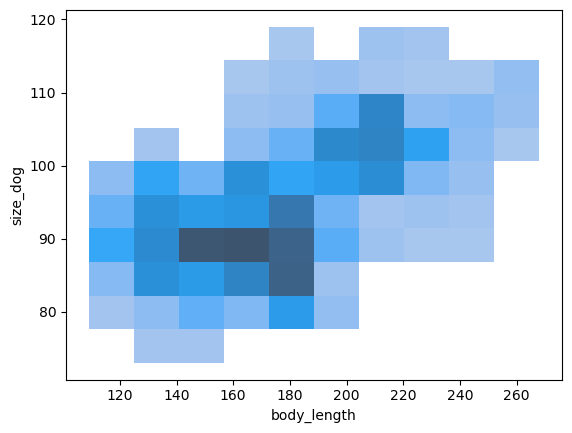

In [61]:
sns.histplot(data=filledDog_df, x='body_length', 
             y='size_dog', bins=10)
plt.show()

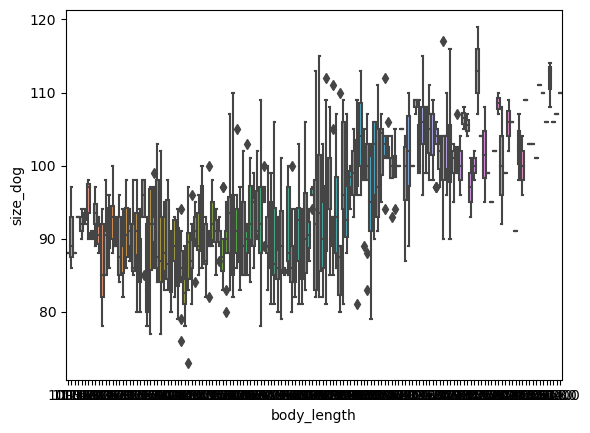

In [62]:

sns.boxplot(data=filledDog_df, x='body_length', y='size_dog')
plt.show()

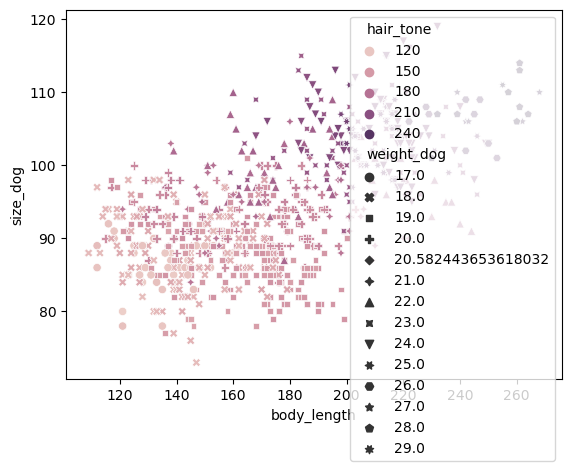

In [63]:
sns.scatterplot(data=filledDog_df, x='body_length', y='size_dog',
                hue='hair_tone', style='weight_dog')
plt.show()